In [1]:
#Setup

#Run if on a clean python install.
#! pip install numpy

#Load dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statistics
import random

In [ ]:
#Q1.

Yes

In [3]:
#Q2.


#a.
x=1-(0.16+0.16+0.22+0.26)
print(f"x=",x)
#x=0.2

#The property I am using is that the sum of each row of a stochastic matrix is 1.
#This holds mathematically because each row contains the probability of every possible state change from n to n+1.
#Since probabilities need to sum to 1, and each row contains all probabilities of an event, each row must sum to 1.


#b.
#Initial distribution states
pi0=np.array([0.13,0.24,0.32,0.28,0.03])

#Write up P
P=np.array([[0.21,0.07,0.15,0.11,0.46],[0,1,0,0,0],[0.16,0.16,0.22,0.2,0.26],[0,0,0,1,0],[0.21,0.27,0.18,0.24,0.1]])
print(P)

#Raising a stochastic matrix to the x power gives the distribution of states after x generations
#First generation is P^1, so pi*P
print(f"The first generation is",np.matmul(pi0,P))
#Second generation
print(f"The second generation is",np.matmul(pi0,np.linalg.matrix_power(P,2)))
#Third generation
print(f"The third generation is",np.matmul(pi0,np.linalg.matrix_power(P,3)))

#Over time, the distribution tends towards B and D.  This makes sense, as B and D are absorbing states.


#c.
P2=np.array([[0.21,0.15,0.46,0.07,0.11],[0.16,0.22,0.26,0.16,0.2],[0.21,0.18,0.1,0.27,0.24],[0,0,0,1,0],[0,0,0,0,1]])
print(P2)

#R is the upper right corner of P, so P14 through P35
R=np.array([[0.07,0.11],[0.16,0.2],[0.27,0.24]])
print(f"R=",R)

#Q is the upper left corner of P, so P11 through P33
Q=np.array([[0.21,0.15,0.46],[0.16,0.22,0.26],[0.21,0.18,0.1]])
print(f"Q=",Q)


#d.
#So I need to calculate N, which is (I-Q)^-1.
#I is the identity matrix
#Q is from earlier and is all states from the matrix that are transient to transient
I=np.eye(3)
N=np.linalg.matrix_power((I-Q),-1)
print(f"N=",N)


#e.
#So I need to calculate M, which is the sum of each row of N
M=np.array([sum(N[0]),sum(N[1]),sum(N[2])])
print(f"M=",M)


#f.
#So I need to calculate B, which is N dot R.  R is all states from the matrix that are transient to absorbing
B=np.matmul(N,R)
print(f"B=",B)

x= 0.19999999999999996
[[0.21 0.07 0.15 0.11 0.46]
 [0.   1.   0.   0.   0.  ]
 [0.16 0.16 0.22 0.2  0.26]
 [0.   0.   0.   1.   0.  ]
 [0.21 0.27 0.18 0.24 0.1 ]]
The first generation is [0.0848 0.3084 0.0953 0.3655 0.146 ]
The second generation is [0.063716 0.369004 0.059966 0.428928 0.078386]
The third generation is [0.03943598 0.4042229  0.0368594  0.4667426  0.05273912]
[[0.21 0.15 0.46 0.07 0.11]
 [0.16 0.22 0.26 0.16 0.2 ]
 [0.21 0.18 0.1  0.27 0.24]
 [0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   1.  ]]
R= [[0.07 0.11]
 [0.16 0.2 ]
 [0.27 0.24]]
Q= [[0.21 0.15 0.46]
 [0.16 0.22 0.26]
 [0.21 0.18 0.1 ]]
N= [[1.64119212 0.54556112 0.99643807]
 [0.49746757 1.53899334 0.69885928]
 [0.48243834 0.43509626 1.48338518]]
M= [3.18319131 2.7353202  2.40091979]
B= [[0.47121151 0.52878849]
 [0.46975367 0.53024633]
 [0.50390009 0.49609991]]


In [5]:
#Q3.

#a.
alpha=350/100
beta=521/100

#I would assume it will oscillate.  This function is a variation of sinx*cosx, and both of those components oscillate.
#No other part of the equation interacts with the variables, so presumably the function will be dominated by its trigonometric components.

#b.
#I'll start by running the given code, adding the presumed variables
#Set a long enough time span to ensure trends can emerge
N=1000
#t is instantly overwritten, so its initial value isn't too important
t=0
#Start with dt as a non-factor in order to make sure things run.  Since dt is a scalar, set it to 1
dt=1

x=0
for i in range(N):
    t=i*dt
    x=x+(1/alpha)*np.sin(x)*np.cos(t)*dt+(1/beta)*np.random.normal(0,1)

#Weiner process is N(0,sqrt(dt)).  So change 1 to sqrt(dt).

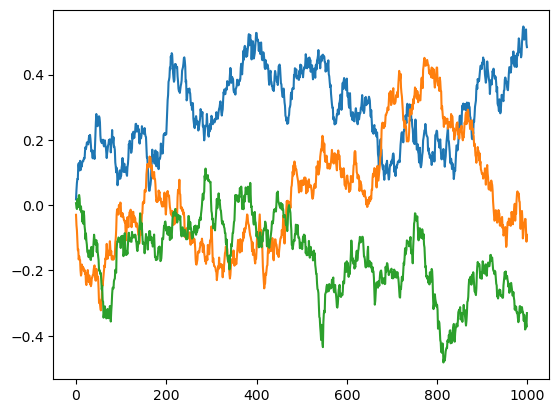

In [7]:
#c.

#I decided to make it a function to make rerunning it easier
def Q3c_walk(dt):
    N=1000
    t=0
    alpha=350/100
    beta=521/100
    vals=[]
    x=0
    dt=dt
    for i in range(N):
        t=i*dt
        x=x+(1/alpha)*np.sin(x)*np.cos(t)*dt+(1/beta)*np.random.normal(0,np.sqrt(dt))
        vals.append(x)
    return(vals)

walk1=Q3c_walk(0.01)
walk2=Q3c_walk(0.01)
walk3=Q3c_walk(0.01)
plt.plot(walk1)
plt.plot(walk2)
plt.plot(walk3)
plt.show()

#The three lines differ because the function has a random component.

In [9]:
#d.
#I only need the last value of each walk, so remove vals
def Q3d_walk(dt):
    N=2500
    t=0
    alpha=350/100
    beta=521/100
    x=0
    dt=dt
    for i in range(N):
        t=i*dt
        x=x+(1/alpha)*np.sin(x)*np.cos(t)*dt+(1/beta)*np.random.normal(0,np.sqrt(dt))
    return(x)

#Running this can take a few seconds.  Its doing 12.5 million calculations, so give it its time.

vals=[]
for i in range(1000):
    #Split into two operations because Python can get a bit wierd if you try to condense this to one line
    temp=Q3d_walk(0.01)
    vals.append(temp)
print(f"The mean position after 2500 steps for dt=0.01 is",np.mean(vals))

vals=[]
for i in range(1000):
    temp=Q3d_walk(0.05)
    vals.append(temp)
print(f"The mean position after 2500 steps for dt=0.05 is",np.mean(vals))

vals=[]
for i in range(1000):
    temp=Q3d_walk(0.1)
    vals.append(temp)
print(f"The mean position after 2500 steps for dt=0.1 is",np.mean(vals))

vals=[]
for i in range(1000):
    temp=Q3d_walk(0.2)
    vals.append(temp)
print(f"The mean position after 2500 steps for dt=0.2 is",np.mean(vals))

vals=[]
for i in range(1000):
    temp=Q3d_walk(0.4)
    vals.append(temp)
print(f"The mean position after 2500 steps for dt=0.4 is",np.mean(vals))

#This is somewhat what I expected.  They all tend towards roughly 1/beta,
#which makes sense as the main function oscillates while 1/beta has only a random component.

The mean position after 2500 steps for dt=0.01 is -0.12871016308622285
The mean position after 2500 steps for dt=0.05 is -0.099329310487404
The mean position after 2500 steps for dt=0.1 is -0.12147854774029611
The mean position after 2500 steps for dt=0.2 is -0.21228230773297355
The mean position after 2500 steps for dt=0.4 is 0.011774861570168469


The mean of this walk is 0.0032924536927278077
The standard deviation of this walk is 0.9584176438585431


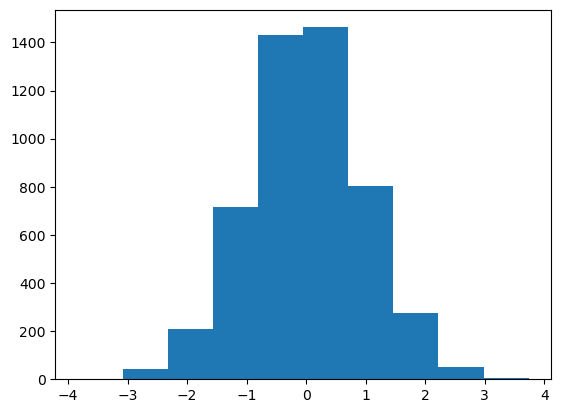

In [11]:
#e.

#Again, this will take a bit.  12.5 million calculations.

vals=[]
for i in range(5000):
    temp=Q3d_walk(0.01)
    vals.append(temp)
plt.hist(vals)

#That's pretty close to Normal.

print(f"The mean of this walk is",np.mean(vals))
print(f"The standard deviation of this walk is",statistics.stdev(vals))

In [13]:
#f.

vals=[]
for j in range(2500):
    x=0
    for i in range(1000):
        x=x+(1/3.5)*np.sin(x)*np.cos(i)*0.01+(1/5.21)*np.random.normal(0,np.sqrt(dt))
    vals.append(x)
print(np.mean(vals))
print(statistics.stdev(vals))
#So mean of around 0 and sd of around 6.
#Doing some quick p-value calculations yields a 2*0.36944=73.888% chance of being greater than abs(2).  That's pretty high.

#As a scalar, dt would increase this probability by increasing variance.
#I don't believe t is a large factor, as t cauces oscillations, not an overall increase or decrease.
#The said, due to said oscillation there are certain values of t that have a higher chance of resulting in abs(x)>2
#due to being at the extremes of the oscillation.

0.04088557537211363
6.2155641019038335


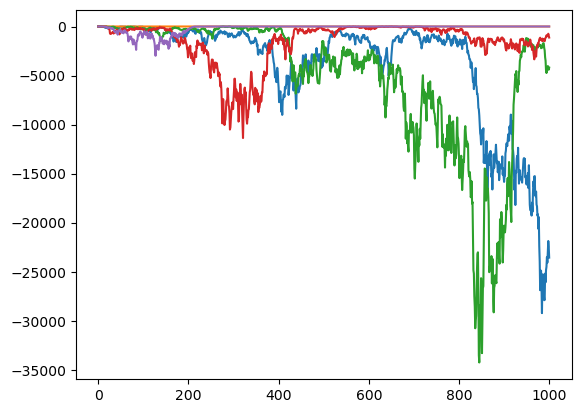

1.001
1.001
1.001
1.001
1.001


2.6755172944899033

In [15]:
#Q4.

def f(w,x,y,z):
    himmel1 = -((w**2 + x - 11)**2 + (w + x**2 - 7)**2) / 100
    himmel2 = -((y**2 + z - 11)**2 + (y + z**2 - 7)**2) / 100
    peak1 = 4.0 * np.exp(-0.2 * ((w-2.5)**2 + (x-1.8)**2 + (y+1.2)**2 + (z-0.7)**2))
    peak2 = 3.8 * np.exp(-0.18 * ((w+1.8)**2 + (x-2.2)**2 + (y-2.5)**2 + (z+1.5)**2))
    peak3 = 3.5 * np.exp(-0.22 * ((w-0.5)**2 + (x+2.8)**2 + (y-1.8)**2 + (z+2.3)**2))
    peak4 = 3.3 * np.exp(-0.25 * ((w+2.2)**2 + (x+0.8)**2 + (y+2.5)**2 + (z-2.1)**2))
    interaction = 0.2 * np.sin(w + x) * np.cos(y - z)
    return himmel1 + himmel2 + peak1 + peak2 + peak3 + peak4 + interaction

w=random.uniform(-3.5,3.5)
x=random.uniform(-3.5,3.5)
y=random.uniform(-3.5,3.5)
z=random.uniform(-3.5,3.5)
x_init=[w,x,y,z]
sigma=1
n_steps=1000

def metropolis_hastings(f, x_init, sigma, n_steps):
    x_current=x_init
    f_current=f(* x_current)
    history=[f_current]
    for i in range(n_steps):
        x_proposal=x_current+np.random.normal(0, sigma, size=4)
        f_proposal=f(* x_proposal)
        # Accept if better, chance to reject if worse
        if f_proposal>f_current:
            x_current=x_proposal
            f_current=f_proposal
        else:
            temp=random.random()
            if temp<(f_proposal/f_current):
                x_current=x_proposal
                f_current=f_proposal
        history.append(f_current)
    return x_current, history

metropolis_hastings(f, x_init, sigma, n_steps)
#final_x, history = metropolis_hastings(f, x_init, 0.5, 2000)


#a.

#i.
#So that it doesn't get trapped in local maxima.
#If it only ever goes up, it can arrive at a local maxima, see there is no immediately better solution, and stop, missing the true maximum.
#ii.
#It would be a tradeoff of breadth vs. time.  A higher standard deviation would take longer to conclude,
#but would be less likely to get stuck at local maxima.  Which is better is situational.
#iii.
#Because of MCMC method's "naive" approach to optimization, they usually scale quite well.
#Most other methods struggle to compute higher-order problems, but since MCMC doesn't precisely model the subject equation, it will run far quicker.
    
#b.

#The Metropolis-Hastings algorithm has a chance of accepting the proposal value even if it is less than the current value.
#This function does not have that chance.
#This will result in the algorithm getting stuck in regional maximums without finding the true maximum.

#c.

#i.
walk1=metropolis_hastings(f, x_init, sigma, n_steps)
walk2=metropolis_hastings(f, x_init, sigma, n_steps)
walk3=metropolis_hastings(f, x_init, sigma, n_steps)
walk4=metropolis_hastings(f, x_init, sigma, n_steps)
walk5=metropolis_hastings(f, x_init, sigma, n_steps)
plt.plot(walk1[1])
plt.plot(walk2[1])
plt.plot(walk3[1])
plt.plot(walk4[1])
plt.plot(walk5[1])
plt.show()
#ii.
#They do not.  This likely means that the random component of the function is strong.
#iii.
print(len(walk1[1])/1000)
print(len(walk2[1])/1000)
print(len(walk3[1])/1000)
print(len(walk4[1])/1000)
print(len(walk5[1])/1000)
#They are identical.
#iv.
max(max(walk1[1]),max(walk2[1]),max(walk3[1]),max(walk4[1]),max(walk5[1]))
#While it varies between iterations, the max is generally capping out at a bit over 3.
#I expect this value to be closer to the start of the walk, as the walk tends to drift downward as t increases.

#d.

#Given how much the returned value can change between iterations, I'm not too confident.
#I would verify by running the simulation repeatedly and plotting those values in a distribution.